In [26]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import make_classification

In [16]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [17]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.920077,-0.431699,2.223178,-0.469703,0.112177,0
1,-0.626212,2.096600,-0.552630,0.217217,-0.500481,1
2,-3.518664,-1.002526,2.963703,1.885503,1.598664,0
3,-1.361123,1.837815,0.041420,-0.686665,-1.065636,1
4,-0.817650,-0.993594,1.068537,3.408025,1.041112,0


In [27]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [28]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [29]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [30]:
df1 = combined_sampling(df,0.5,0.5)

/var/folders/5f/7l5r9pzx0jvc117v368rjbc00000gn/T/ipykernel_32609/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [31]:
df2 = combined_sampling(df,0.5,0.5)

/var/folders/5f/7l5r9pzx0jvc117v368rjbc00000gn/T/ipykernel_32609/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [32]:
df3 = combined_sampling(df,0.5,0.5)

/var/folders/5f/7l5r9pzx0jvc117v368rjbc00000gn/T/ipykernel_32609/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [33]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col4', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')


In [34]:
df3

,col5,col3,target
24,-1.029602,-0.719627,1
73,-0.089976,2.021604,0
8,1.117585,0.666575,0
33,2.543070,-2.466898,1
45,-0.363080,-0.737427,1
35,-1.793871,0.496755,1
18,2.310258,-0.778250,0
53,0.903469,1.178275,0
53,0.903469,1.178275,0
82,1.470667,-2.574740,0


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [36]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [37]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[0] <= -0.175\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2, 0.625, 'x[0] <= -0.71\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.3, 0.375, 'x[0] <= -0.664\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.625, 'x[1] <= -0.909\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.7, 0.375, 'x[1] <= -1.579\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]')]

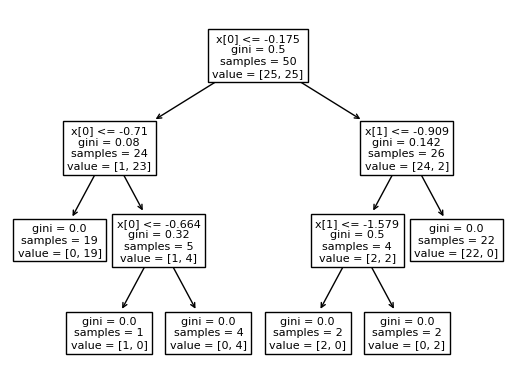

In [38]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.344\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.5, 0.625, 'x[0] <= 1.295\ngini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -0.073\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

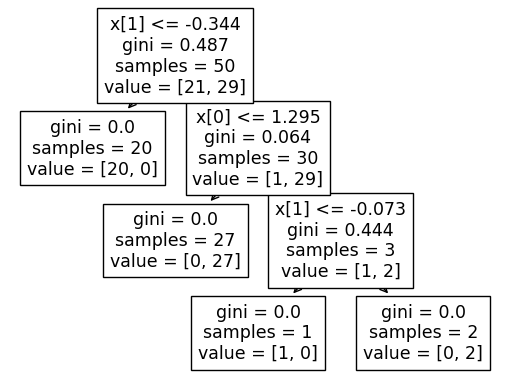

In [39]:
plot_tree(clf2)

[Text(0.3333333333333333, 0.9166666666666666, 'x[0] <= -0.147\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2222222222222222, 0.75, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.4444444444444444, 0.75, 'x[1] <= -2.756\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= -1.194\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 2.632\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2222222222222222, 0.25, 'x[1] <= -2.521\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[0] <= 0.5

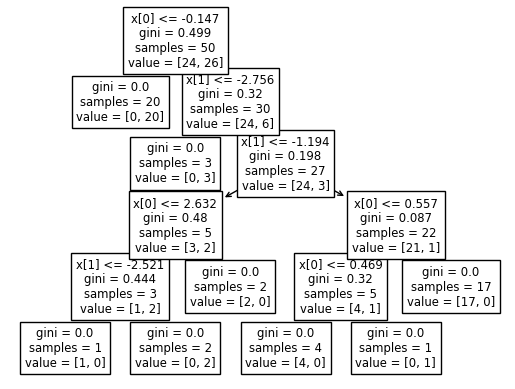

In [40]:
plot_tree(clf3)

In [41]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [42]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [43]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
69,-1.243945,-0.599256,2.353151,0.556835,0.442648,0
48,0.236345,0.503311,-3.282539,-1.447447,0.736542,1
55,-1.766017,-0.570399,0.618821,1.324024,0.814417,0
48,0.236345,0.503311,-3.282539,-1.447447,0.736542,1
66,0.152371,1.017678,-0.053778,-0.923995,-0.848566,1
84,-0.226300,1.029089,-0.293951,-1.858053,-0.472125,1
56,-0.822493,-1.449307,-3.913887,-0.383821,2.031652,0
15,-1.338610,1.099122,-1.336207,-2.561927,-0.784208,1
40,-2.797150,-0.361176,1.253423,-4.350723,0.536218,0
11,-1.708789,1.501207,0.176683,-1.918614,-0.912807,1
